<a href="https://colab.research.google.com/github/Vidhuran-Rajendran/Cardiovascular-Risk-Prediction-Capsotne-3/blob/main/Project3_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

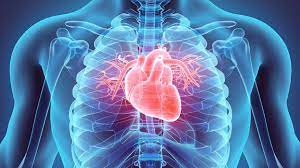
 # **Cardiovascular Risk Prediction**

## <b> Problem Description </b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

## <b> Data Description </b>

### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target) 

**10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV**

# Architecture
Data Preparation and Exploratory Data Analysis > Build Predictive Model using Multiple Techniques/Algorithms > Optimal Model identified through Testing and Evaluation

# Importing

In [2]:
# importing required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing dataset and reading
file='/content/drive/MyDrive/Colab Notebooks/ALma better/Capstone project/capstone 3/data_cardiovascular_risk.csv'
data=pd.read_csv(file,index_col='id')
data1=data.copy()

# Data Inspection

In [5]:
# First look
data1.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# looking into shape of the dataset
data1.shape

(3390, 16)

In [7]:
# looking into information of the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [8]:
# looking in descriptive summary of dataset
data1.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


[Text(0, 0.5, 'mean'),
 Text(0, 1.5, 'std'),
 Text(0, 2.5, 'min'),
 Text(0, 3.5, '25%'),
 Text(0, 4.5, '50%'),
 Text(0, 5.5, '75%'),
 Text(0, 6.5, 'max')]

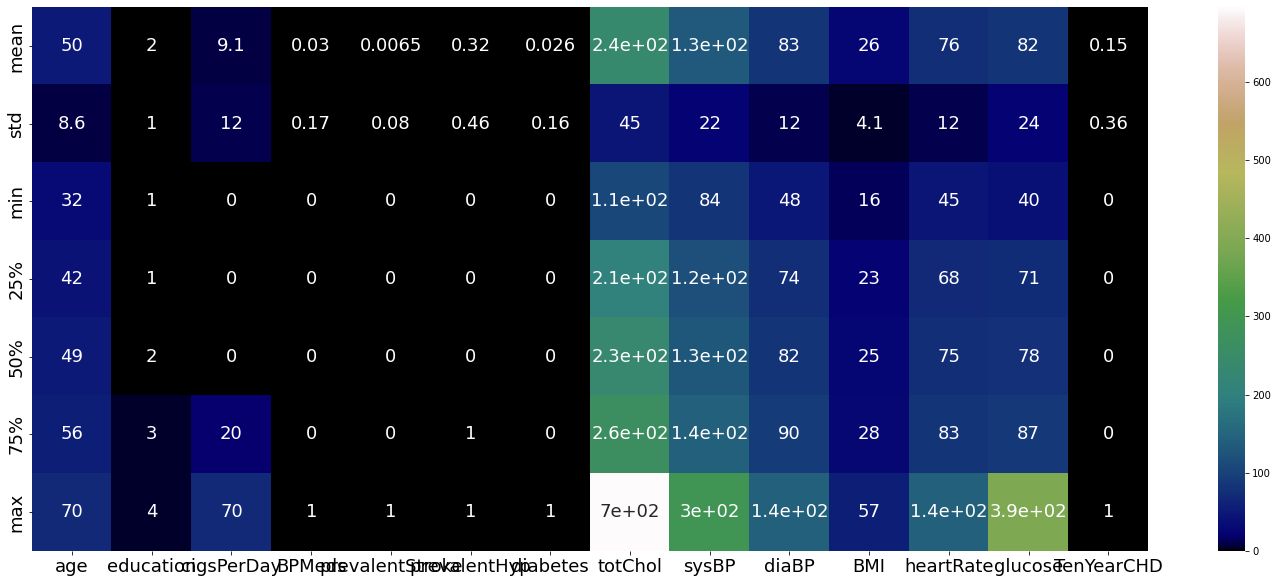

In [9]:
# Descriptive stats in visual form

plt.figure(figsize=(25,10))
svm=sns.heatmap(data1.describe()[1:], annot=True, cmap='gist_earth',annot_kws={'size':18})
svm.set_xticklabels(svm.get_xmajorticklabels(),fontsize=18)
svm.set_yticklabels(svm.get_ymajorticklabels(),fontsize=18)


# Handiling missing values

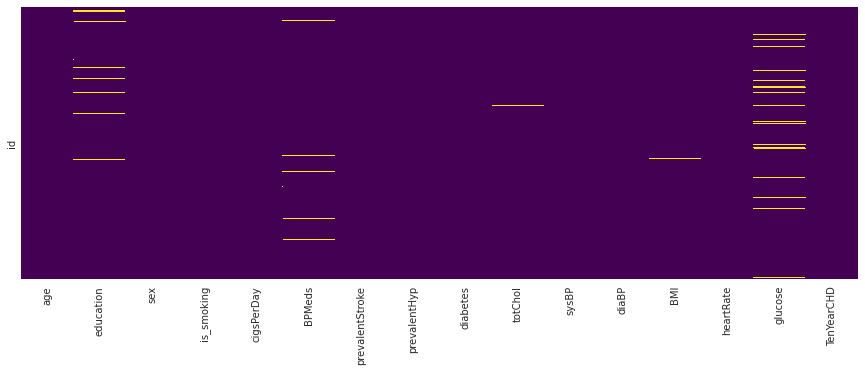

In [10]:
# looking for missing values in dataset
sns.set_style('whitegrid')
fig,axes=plt.subplots(1,1,figsize=(15,5))
sns.heatmap(data1.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [11]:
# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))


Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [12]:
# from above we can see that not so many values are missing so we can just drop them
data1.dropna(inplace=True)

# Outlier Detection

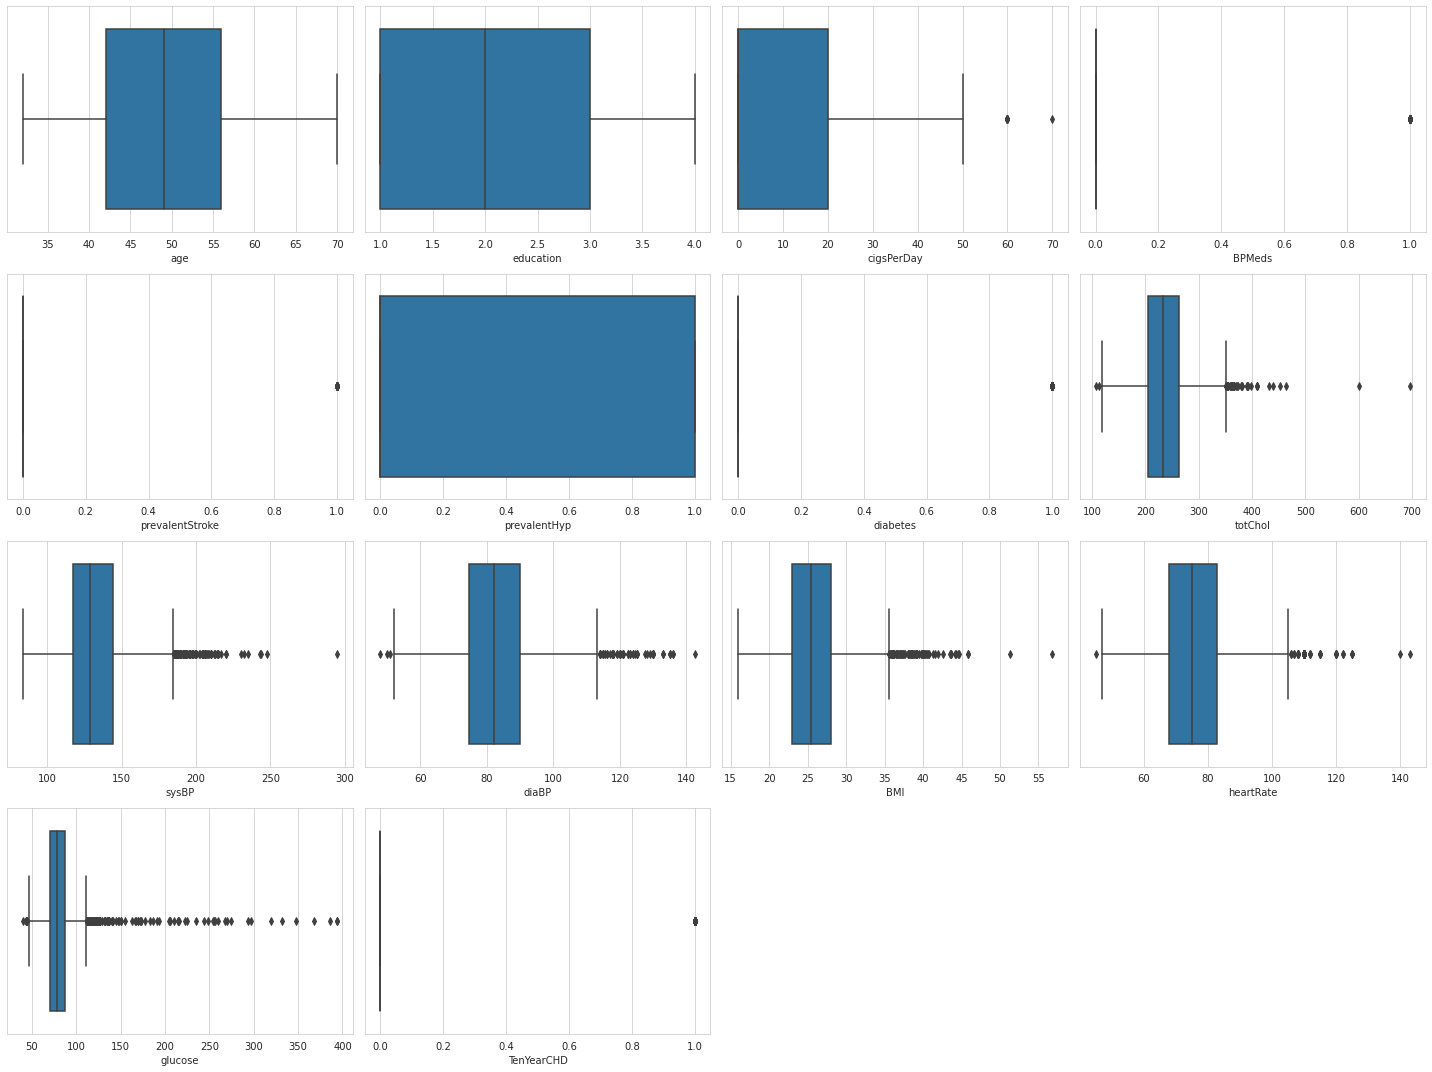

In [13]:
columns=data1.describe()
n=1
plt.figure(figsize=(20,15))
for column in columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.boxplot(data[column])
  plt.tight_layout()

- There are Outliers but within the possible range of values

lets check the correlation between each feature.

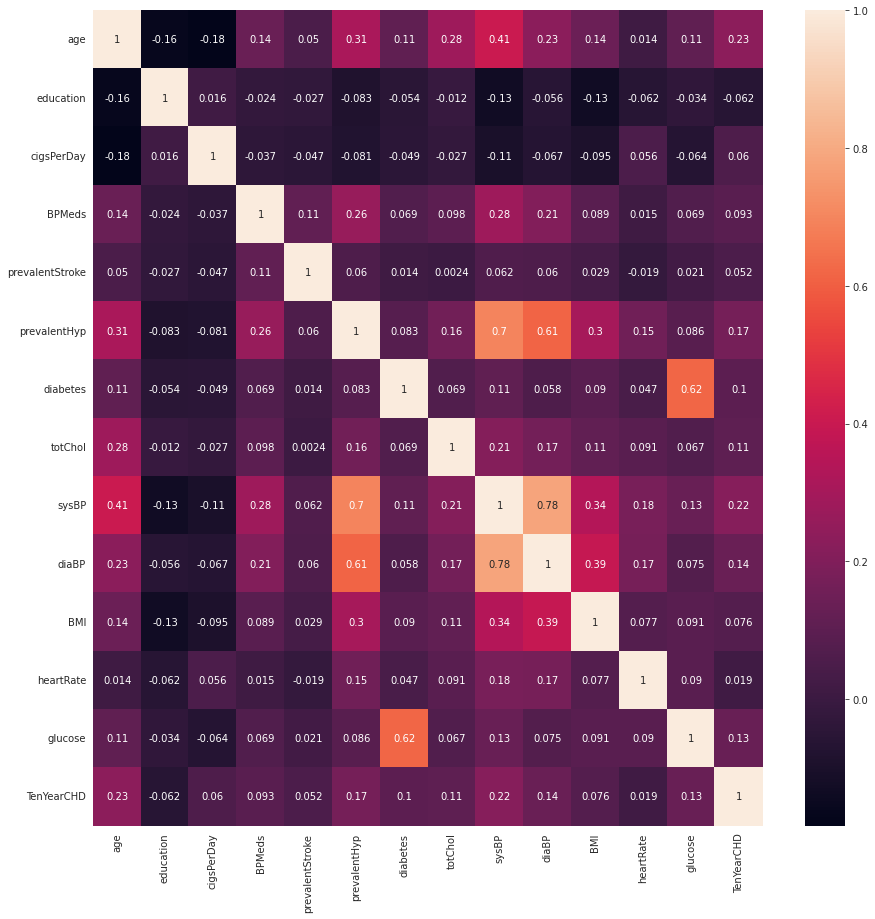

In [14]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(),annot=True)

- from above heatmap we can see that there in no significant correlation between independent and dependent variables but there is a high correlation within independent variables

# EDA and Data Preprocessing

### **A) Gender**

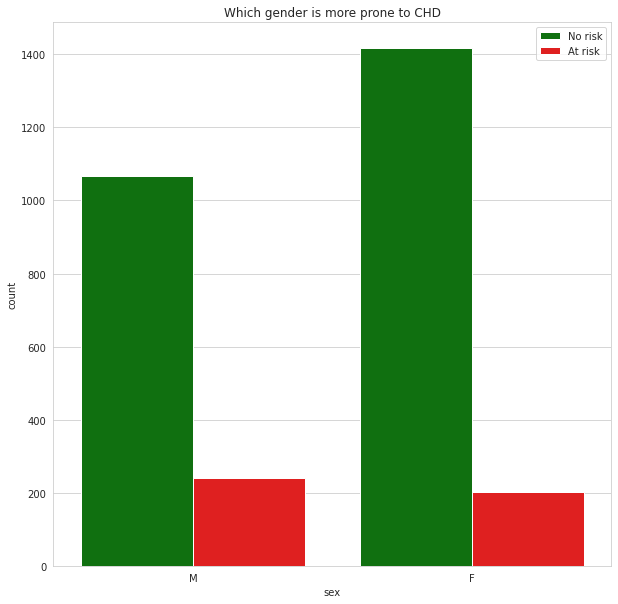

In [18]:
# gender wise analysis
#10 year risk of coronary heart disease CHD(binay: '1', means 'Yes', 0 means 'No')
plt.figure(figsize = (10,10))
sns.countplot(x=data1['sex'],hue=data1['TenYearCHD'], palette={0:'green',1:'red'})
plt.title('Which gender is more prone to CHD')
plt.legend(['No risk','At risk'])
plt.show()

- from above plot **Male are more prone to coronary heart disease**

### **B) Diabetes**

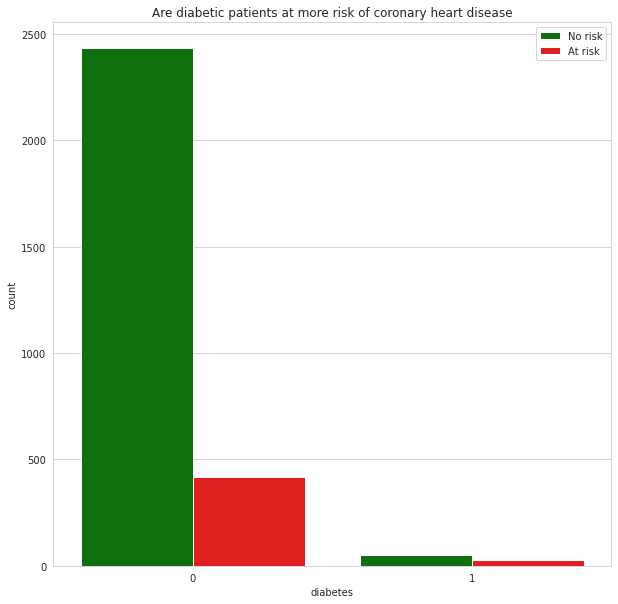

In [19]:
# Diabetes patient analysis
plt.figure(figsize = (10,10))
sns.countplot(x=data1['diabetes'],hue=data1['TenYearCHD'], palette={0:'green',1:'red'})
plt.title('Are diabetic patients at more risk of coronary heart disease')
plt.legend(['No risk','At risk'])
plt.show()

- from the above plot **diabetics patients are more prone to CHD than non diabetics**

### **C) Is Smoking**

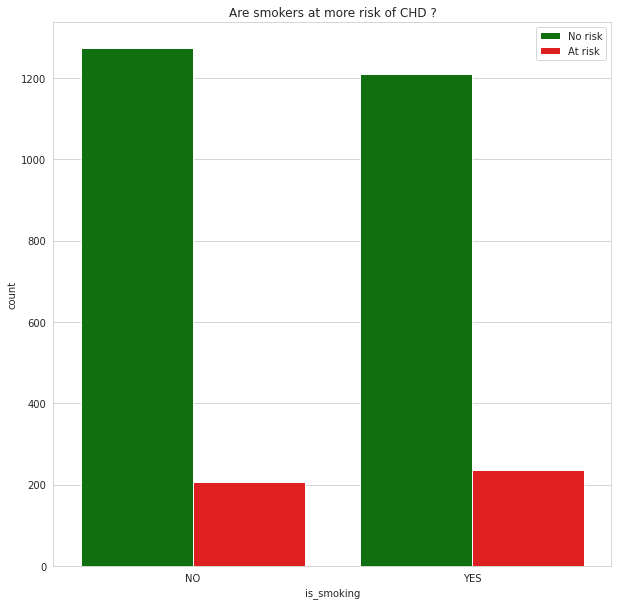

In [22]:
# Diabetes patient analysis
plt.figure(figsize = (10,10))
sns.countplot(x=data1['is_smoking'],hue=data1['TenYearCHD'], palette={0:'green',1:'red'})
plt.title('Are smokers at more risk of CHD ?')
plt.legend(['No risk','At risk'])
plt.show()

- from above plot **smokers are more prone to CHD that non smokers not that much difference**

### **D)Hypertensice Patients**

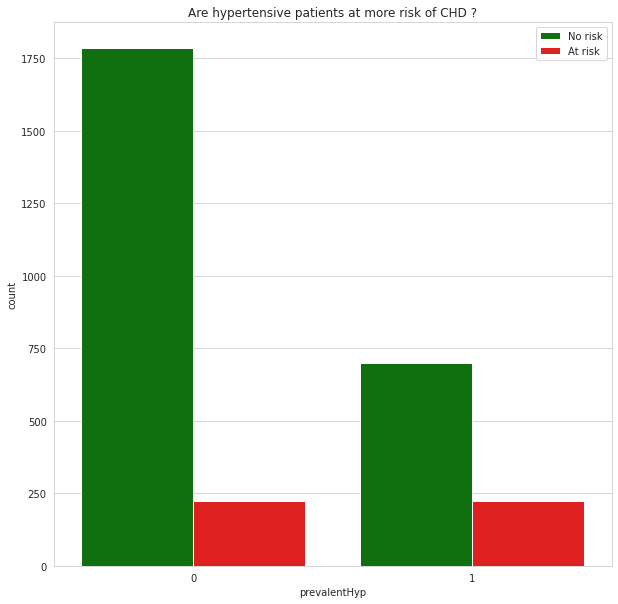

In [23]:
# are hypertensive patients at risk
plt.figure(figsize = (10,10))
sns.countplot(x=data1['prevalentHyp'],hue=data1['TenYearCHD'], palette={0:'green',1:'red'})
plt.title('Are hypertensive patients at more risk of CHD ?')
plt.legend(['No risk','At risk'])
plt.show()

- form above plot **hypertensive patients are prone to coronary heart disease.**

lesser population than non hypertensive but still we can see around 30% are at risk.

### **E) BPMeds**

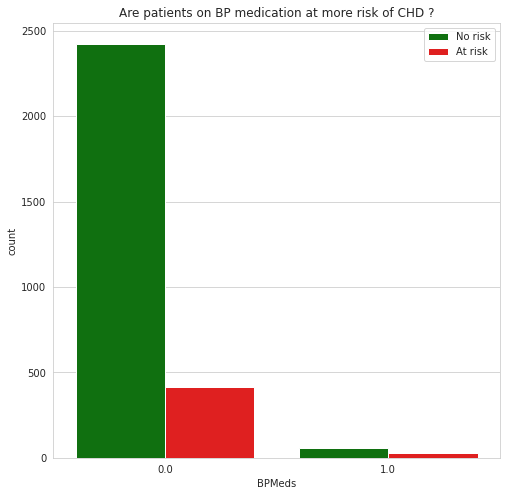

In [25]:
# patients with bp on meds analysis
plt.figure(figsize = (8,8))
sns.countplot(x=data1['BPMeds'],hue=data1['TenYearCHD'], palette={0:'green',1:'red'})
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No risk','At risk'])
plt.show()

- from avove plot **patients with blood pressure on medication are at  more risk of coronary heart disease.**